# Heart Disease Prediction using Machine Learning
This notebooks looks into various Python-based machine laerning and data science libraries in an attempt to build a machine
learning model capable of predicting whether or not some person has heart disease based on their medical attributes.

We are going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Problem Statement
Given clinical parameters about a patient, can we predict whether or not he has a heart disease

## Data
**Create Data DIctionary**
There are thirteen features and one target as below:

* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 

    1. typical angina, 
    2. atypical angina, 
    3. non-anginal pain, 
    4. asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (
    * 0 = normal,
    * 1 = having ST-T wave abnormality,
    * 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment (Value 
    1. upsloping, 
    2. flat, 
    3. downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (
    * 3 = normal; 
    * 6 = fixed defect; 
    * 7 = reversable defect)

* target: Heart disease (0 = no, 1 = yes)

Link to the dataset: https://www.kaggle.com/chingchunyeh/heart-disease-report?kernelSessionId=16747294

## Evaluation
If we can reach 95% accuracy at predicting whether or not a person hasheart disease during the proof of the concept, then only we will persue the project

## Features
this is where you will get different information about the features in the data.

# Preparing the tools for Data Analysis
# Importing all required libraires

In [53]:
# Regular Exploratory Data Analysis and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve

# Load Data

In [2]:
data = pd.read_csv("heart-disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.shape # rows,cols

(303, 14)

## Exploratory Data Analysis (EDA)
The goal is to find out more about the data
1. What question(s) are you trying to solve?
2. WHat kind of data do we have?
3. How do we treat different types of data?
4. What is missing from data and how to deal with it?
5. Where are the outliers and how to deal with them?
6. How can we add change or remove features to get more out of data?

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Find out how many datapoints of each calss are ther is data
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

This is a balanced dataset

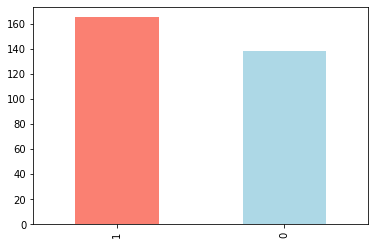

In [7]:
data["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# Check for missing value
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# Comparing columns to find relations with target variable

### Frequency according to Gender

In [12]:
# compare sex to target
data.sex.value_counts()
# female = 0
# male = 1

1    207
0     96
Name: sex, dtype: int64

In [13]:
pd.crosstab(data.target,data.sex)

sex,0,1
target,,
0,24,114
1,72,93


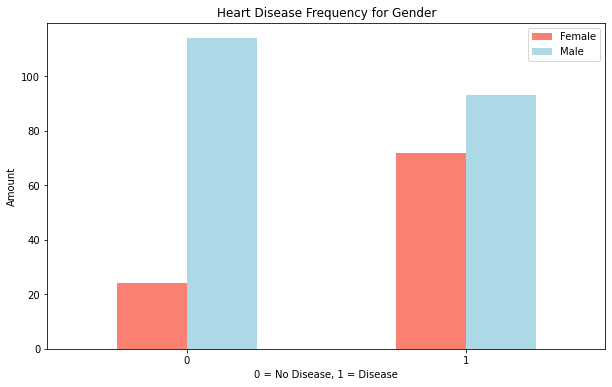

In [14]:
# create a plot of crosstab
pd.crosstab(data.target,data.sex).plot(kind="bar",
                                       figsize=(10,6),
                                      color=["salmon","lightblue"]);
plt.title("Heart Disease Frequency for Gender")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0);

### Comparing age, thalac and target

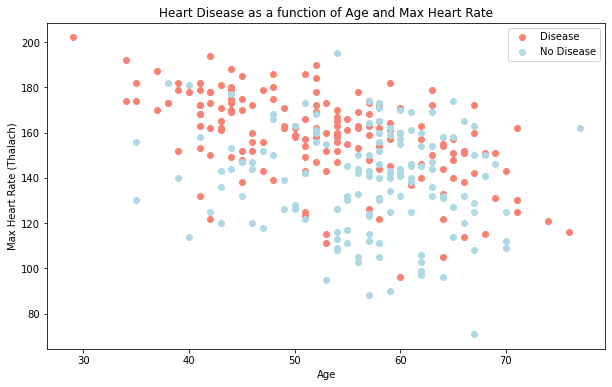

In [15]:
# Create figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(data.age[data.target==1],
           data.thalach[data.target==1],
           c="salmon");

# Scatter with negative examples
plt.scatter(data.age[data.target==0],
           data.thalach[data.target==0],
           c="lightblue");

# Add some extra info 
plt.title("Heart Disease as a function of Age and Max Heart Rate");
plt.xlabel("Age");
plt.ylabel("Max Heart Rate (Thalach)");
plt.legend(["Disease","No Disease"]);

The above plot shows a downward trend. Younger age people have higher heart rate. As the age increases the heart rate reduces and they get heart disease

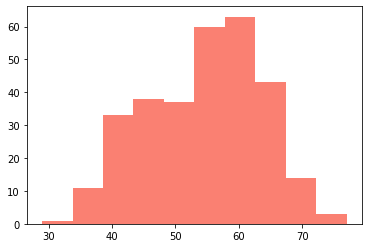

In [16]:
# Check distribution of Age
plt.hist(data.age,color="salmon");

Our data is right skewed i.e majority of people who have heart disease are in the the age group of 55 to 65

### Heart Disease Frequency per Chest pain Type

cp: The chest pain experienced (Value 

    1. typical angina, 
    2. atypical angina, 
    3. non-anginal pain, 
    4. asymptomatic)

In [17]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


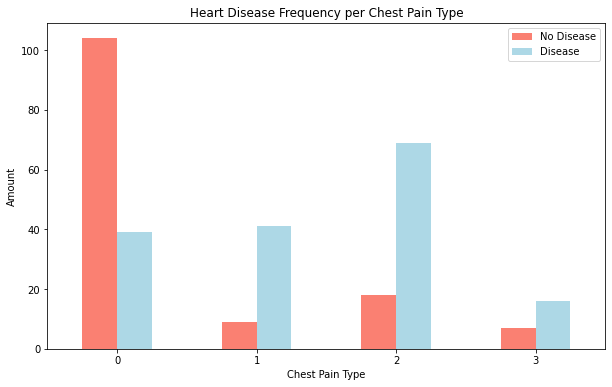

In [18]:
pd.crosstab(data.cp, data.target).plot(kind="bar",
                                      figsize=(10,6),
                                      color=["salmon","lightblue"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

### Co-Relation between Independent and Dependent Variables

In [19]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


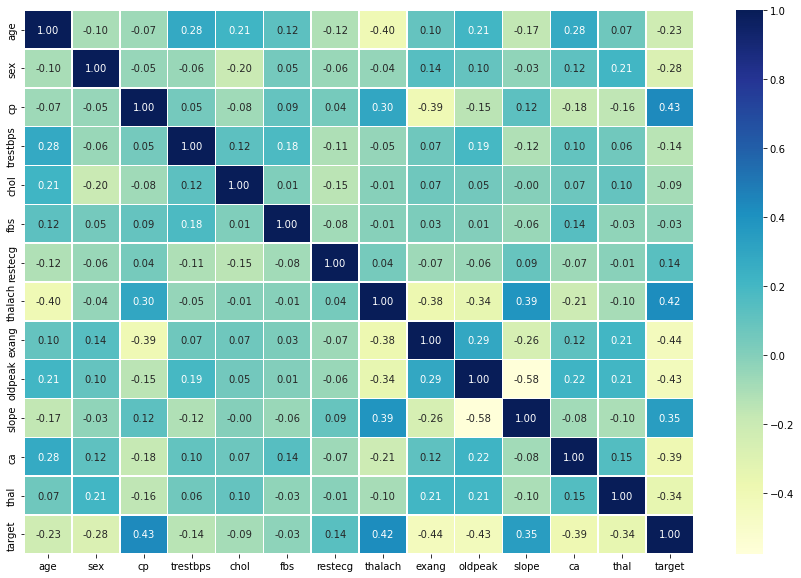

In [20]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

* A higher positive value in corr matrix means a potential positive corelation
* A higher negative value in corr matrix means a potential negative corelation

As cp increases , the target value also increases

## Modelling

In [21]:
np.random.seed(42)
# Split data into X and y
X = data.drop("target",axis=1)
y = data["target"]

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# Split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [26]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


Trying 3 different machine learning models:

    1. Logistic Regression
    2. K Nearest Neighbours Classifier
    3. Random Forest Classifier

In [27]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "K Nearest Neighbours": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Decision Tree": DecisionTreeClassifier()}

# Create a function to fit nd score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    '''Fits and evaluate machine laerning models
    models: a dictionary of differnt machine learning classification models
    X_train: Training data (no labels)
    X_test: Testing data (no labels)
    y_train: train labels
    y_test: test lables'''
    np.random.seed(42)
    # Make a dictionary to keep model score
    model_score = {}
    # Loop through models
    for name,model in models.items():
        # Fit the model to data
        model.fit(X_train,y_train)
        # Evaluate model and append its score
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [28]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

D:\Miniconda_installation\envs\Jupyter_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K Nearest Neighbours': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'Decision Tree': 0.8524590163934426}

### Model Comparison

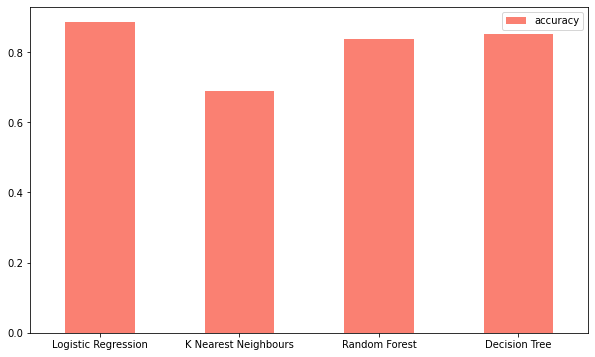

In [29]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(color="salmon", figsize=(10,6));
plt.xticks(rotation=0);

### Evaluating Model

* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area Under Curve

#### Hyperparameter Tuning (by Hand)

In [30]:
# Tuning KNN
training_scores= []
testing_scores = []

# Create a list of different values for N Neighbours
neighbours = range(1,21)
knn = KNeighborsClassifier()

# loop through different N neighbours
for i in neighbours:
    knn.set_params(n_neighbors = i)
    # Fit the model
    knn.fit(X_train,y_train)
    # Update training score
    training_scores.append(knn.score(X_train,y_train))
    #Update testing score
    testing_scores.append(knn.score(X_test,y_test))

In [31]:
training_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [32]:
testing_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score on test data :  75.40983606557377


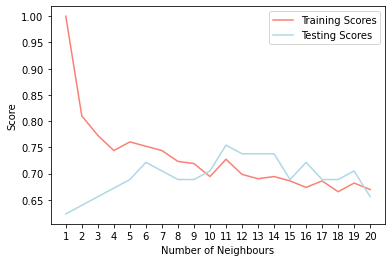

In [33]:
plt.plot(neighbours, training_scores,label="Training Scores",color="salmon")
plt.plot(neighbours, testing_scores,label="Testing Scores",color="lightblue")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Score");
plt.legend();
print("Max KNN score on test data : ", max(testing_scores)*100)

#### Hyperparameter tuning with RandomisedSearchCV
Tuning the following models:
* LogisticRegression()
* RandomForestClassifier()
* DecisionTree()

In [ ]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}

# Createhyperparameter grid for RandomForestClassifier()
ran_for_grid = {"n_estimators": np.arange(10,1000,50),
               "max_depth":[None,3,5,10],
               "min_samples_split":np.arange(2,20,2),
               "min_samples_leaf":np.arange(1,20,2)}

# Createhyperparameter grid for DecisionTreeClassifier()
dec_tree_grid = {"criterion":["gini", "entropy"],
                "max_depth":[None,3,5,10],
                "min_samples_split":np.arange(2,20,2),
                "min_samples_leaf":np.arange(1,20,2)}

In [35]:
# tune logisticRegression
np.random.seed(42)
# Setup random Hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv =5,
                                n_iter=20,
                                verbose=True)
# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [41]:
# Tuning Random forest classifier
np.random.seed(42)
# Setup random Hyperparameter search for Logistic Regression
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions= ran_for_grid,
                                cv =5,
                                n_iter=20,
                                verbose=True)
# Fit random hyperparameter search model for Logistic Regression
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [42]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [43]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [44]:
# Tuning Decision Tree classifier
np.random.seed(42)
# Setup random Hyperparameter search for Decision Tree
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(),
                           param_distributions= dec_tree_grid,
                           cv =5,
                           n_iter=20,
                           verbose=True)
# Fit random hyperparameter search model for DecisionTree
rs_dt.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
                   verbose=True)

In [45]:
rs_dt.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 9,
 'max_depth': None,
 'criterion': 'gini'}

In [46]:
rs_dt.score(X_test,y_test)

0.8524590163934426

#### Hyperparameter tuning with GridSearchCV

Proceeding with Logistic Regression Model since it has been consistently giving good results

In [49]:
# Different Hyperparameters for LogisticRegression Model
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid= log_reg_grid,
                                cv =5,
                                verbose=True)
# Fit th Grid Search hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [50]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [51]:
# Evaluate the gridsearch Logistic  Regression model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating the tuned Machine Learning Classifier
* ROC Curve
* AUC
* Classification Report
* Precision
* Recall
* F1 Score
* Confusion Matrix

To evaluate and make comparisons on trained model, we need to make predictions

In [52]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

##### ROC Curve

D:\Miniconda_installation\envs\Jupyter_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


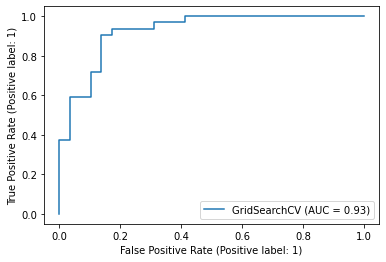

In [54]:
# Plot ROC curve and calculate AUC metrics
plot_roc_curve(gs_log_reg,X_test,y_test)

##### Confusion Matrix

In [56]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


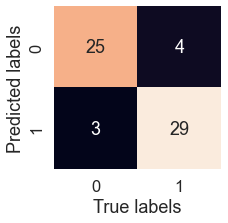

In [57]:
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test,y_preds):
    '''
    Plots a nice looking confsion matrix using Seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True labels")
    plt.ylabel("Predicted labels")
    
plot_conf_matrix(y_test,y_preds)
    

##### Classification Report

In [58]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [60]:
# classification report using cross validation
# check best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [61]:
# create a new classifier with the above prameters
clf = LogisticRegression(C= 0.20433597178569418,
                         solver="liblinear")

In [64]:
# Cross validated Accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [65]:
# Cross validated Precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [66]:
# Cross validated Recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [67]:
# Cross validated F1 Score
cv_f1score = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1score = np.mean(cv_f1score)
cv_f1score

0.8673007976269721

In [69]:
# Visualize the cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall":cv_recall,
                          "F1 Score": cv_f1score},
                         index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1 Score
0,0.844699,0.820794,0.921212,0.867301


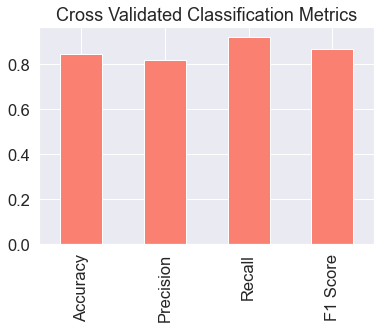

In [75]:
cv_metrics.T.plot.bar(title="Cross Validated Classification Metrics",
                   legend = False,
                   color = "salmon");

#### Feature Importance
It tells which features contributed the most to the outcome of the model

In [78]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(C= 0.20433597178569418,
                         solver="liblinear")
clf.fit(X_train,y_train);

In [79]:
# Check coefficients
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [80]:
# Match Coeff of Features to Cloumns
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

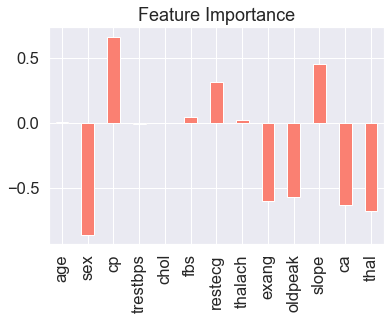

In [82]:
# Visualize feature importance i.e relation of each feature to target variable
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend = False,color="salmon");